In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from src.predictions import back_test

df = pd.read_csv(r'../stonks.csv')

In [2]:
df_subset = df.iloc[:20]
df_subset

,Date,Title,Article,Price
0,2024-01-01,Tech Innovators Inc. Releases Groundbreaking A...,Tech Innovators Inc. has announced the launch ...,102.55
1,2024-01-02,Market Analysis: The Rise of Renewable Energy ...,Analysts predict a significant increase in ren...,103.60
2,2024-01-03,Economic Outlook 2024: What Investors Need to ...,Experts share insights on the economic trends ...,104.56
3,2024-01-04,Earnings Report: Tech Giants Outperform Expect...,The latest earnings reports show that major te...,103.08
4,2024-01-05,Global Markets React to Interest Rate Changes,Global stock markets experience volatility fol...,100.08
5,2024-01-06,Investing in 2024: Top 5 Stocks to Watch,Financial advisors reveal the top stocks to wa...,100.31
6,2024-01-07,Cryptocurrency Boom: Is It Here to Stay?,The cryptocurrency market continues to gain tr...,99.03
7,2024-01-08,Mergers and Acquisitions: A Look at 2024 Trends,A comprehensive analysis of the mergers and ac...,98.39
8,2024-01-09,Sustainable Investing: Aligning Profit with Pu...,Investors are increasingly looking for ways to...,98.51
9,2024-01-10,Tech Stocks: The Future of Innovation and Inve...,"A deep dive into the tech sector, examining th...",98.47


In [3]:
return_values = back_test(df_subset)

Connecting to proxy localhost:50050


In [4]:
return_values

[1,
 1.00105,
 1.00297,
 0.9985299999999999,
 0.98653,
 0.9876799999999999,
 0.9799999999999998,
 0.9755199999999997,
 0.9764799999999998,
 0.9761199999999998,
 0.9735099999999999,
 0.9589299999999998,
 0.9557799999999997,
 0.9400299999999997,
 0.9636099999999997,
 0.9557799999999997,
 0.9645099999999998,
 0.9672099999999997,
 0.9742299999999997,
 0.9854799999999997]

In [5]:
df_subset['returns'] = pd.Series(
    return_values, 
    index=df_subset.index)
df_subset['returns'] = df_subset['Price'].iloc[0]*df_subset['returns']

/var/folders/jl/5y6t_mdn7s7c6vmy_jl8hphh0000gn/T/ipykernel_15726/1987339565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['returns'] = pd.Series(
/var/folders/jl/5y6t_mdn7s7c6vmy_jl8hphh0000gn/T/ipykernel_15726/1987339565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['returns'] = df_subset['Price'].iloc[0]*df_subset['returns']


Text(0, 0.5, 'Price')

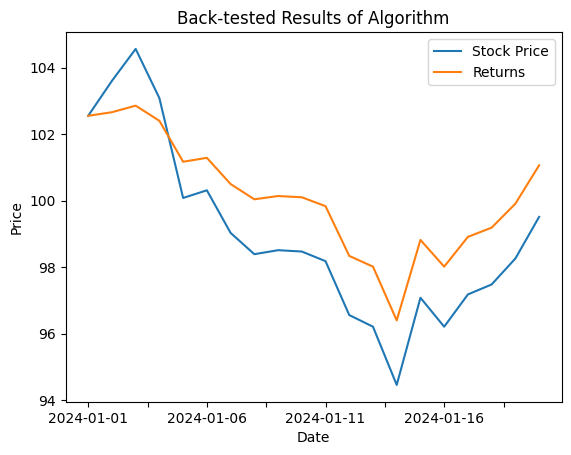

In [16]:
df_subset.plot(x='Date', y=['Price', 'returns'], title='Back-tested Results of Algorithm', label=['Stock Price', 'Returns'])
plt.ylabel('Price')